In [1]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

# Step1. 탐색: 데이터의 기초 정보 살펴보기

#### * chipotle dataset의 기초 정보 출력하기

In [2]:
import pandas as pd
file_path = "data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep ='\t')

print(chipo.shape)
print("===============================")
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 4622개의 행과 5개의 feature
- int64: 숫자, object: 문자열, non-null-object: 결측값이 아닌 데이터

#### * chipotle dataset의 행과 열, 데이터 확인하기

In [3]:
chipo.head() # 테이블 형태로 출력

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
print(chipo.columns)
print("=======================================================")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


- order_id: 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템의 이름
- choice_description: 주문한 아이템의 상세 선택 옵션
- item_price: 주문 아이템의 가격 정보

#### * describe() 함수로 기초 통계량 출력하기
* 수치형 피처 vs 범주형 피처

In [5]:
# 수치형 피처에 대한 정보만을 출력한다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


#### * unique() 함수로 범주형 피처 개수 출력하기

In [6]:
print("count: ", len(chipo['order_id'].unique())) 
print(chipo['order_id'].unique())
print("count: ", len(chipo['item_name'].unique()))
print(chipo['item_name'].unique())

count:  1834
['1' '2' '3' ... '1832' '1833' '1834']
count:  50
['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 '

# Step2. 인사이트의 발견: 탐색과 시각화하기

#### * 가장 많이 주문한 아이템 Top 10 출력하기

In [7]:
item_cnt = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_cnt.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


- enumerate:
- ??.iteritems():

#### * 아이템별 주문 개수와 총량

In [8]:
order_cnt = chipo.groupby('item_name')['order_id'].count()
order_cnt[:6]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Barbacoa Soft Tacos      25
Name: order_id, dtype: int64

In [9]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:6]

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Barbacoa Soft Tacos      25
Name: quantity, dtype: int64

- 사실 아이템별 주문 개수와 아이템별 총량은 같다

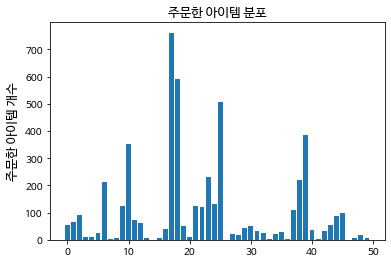

In [10]:
%matplotlib inline
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
# print(item_quantity.index)
# print(item_quantity.values)

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel("주문한 아이템 개수", fontsize=13)
plt.title("주문한 아이템 분포", fontsize=13)
plt.show()

# Step3. 데이터 전처리: 전처리 함수 사용하기

#### * item_price 피처 살펴보기

In [11]:
print(chipo.info())
print("-----------------------------------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-----------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

#### * apply()와 lamda를 이용해 데이터 전처리하기

In [12]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [13]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


- item_price의 dtype이 float형으로 바뀐 것을 알 수 있다

# Step4. 탐색적 분석: 스무고개로 개념적 탐색 분석하기 

#### * 주문당 평균 계산금액 출력하기

In [14]:
chipo.groupby('order_id').sum().mean()

quantity       2.711014
item_price    18.811429
dtype: float64

- 한 사람이 약 18달러 가량의 주문을 할 것이라는 인사이트를 얻을 수 있다.

#### * 한 주문에 18달러 이상 지불한 주문 번호 출력하기
- 모든 주문이 10달러 이상 지불한 결과로 나왔기 때문에 평균 이상의 금액을 주문한 주문 번호를 출력해본다.

In [15]:
chipo_order_id_grp = chipo.groupby('order_id').sum()
# print(chipo_order_id_grp)
results = chipo_order_id_grp[chipo_order_id_grp.item_price >= 18]
#print(results.index.values)
results[:10]

,quantity,item_price
order_id,,
1000,2,20.50
1004,2,21.96
1006,8,71.40
1010,5,33.24
1012,2,22.50
1013,4,31.90
1016,3,32.25
1017,2,22.50
1024,2,18.50


#### * 각 아이템의 가격 구하기

In [16]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


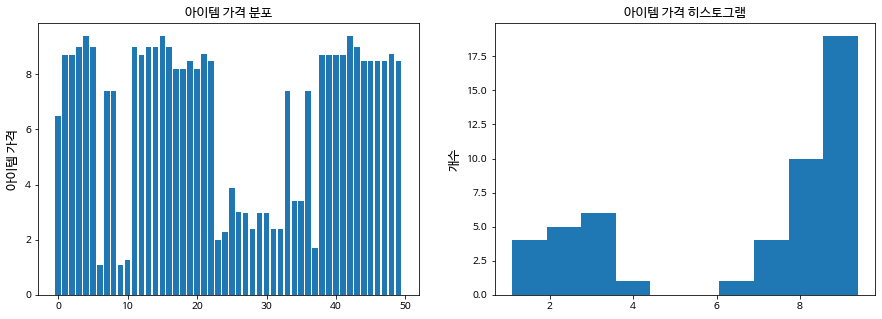

In [26]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.bar(x_pos, item_price, align='center')
plt.ylabel("아이템 가격", fontsize=13)
plt.title("아이템 가격 분포", fontsize=13)

plt.subplot(122)
plt.hist(item_price)
plt.ylabel("개수", fontsize=13)
plt.title("아이템 가격 히스토그램", fontsize=13)
plt.show()

* 2-4달러, 혹은 6-8달러 정도에 아이템의 가격대가 형성되어 있음을 알 수 있다.

#### * 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [29]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


#### * veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [36]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(["item_name", "order_id"])
print("Veggie Salad Bowl 주문 횟수: ", len(chipo_salad))
chipo_salad[:3]

Veggie Salad Bowl 주문 횟수:  18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


#### * "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

In [37]:
chipo_chicken = chipo[chipo.item_name == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken.quantity >= 2]
print("Chicken Bowl을 2개 이상 주문한 주문 횟수 : ", len(chipo_chicken_result))
chipo_chicken_result[:3]

Chicken Bowl을 2개 이상 주문한 주문 횟수 :  33


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
